In [255]:
from collections import Counter
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import sympy
N = 200
V = 3

In [256]:
m = 1 + math.floor(math.log2(N))

In [335]:
def arr_print(x):
    for i in range(N):
        print(x[i], end = "\t")
        if (i % 10 == 9): print()

In [336]:
def group(a0, af, x, int_x, arr_n, arr_w):
    d = af - a0
    print("Интервалы\t\tni\twi")
    boof = a0
    ind = 0
    sum = 0
    sum1 = 0
    int_x.append(a0)
    for i in range(m):
        boof += round(d / m, 5)
        if (i == m - 1): boof = af
        int_x.append(boof)
        n = 0
        while(x[ind] <= boof):
            if (ind >= N - 1): 
                n += 1
                ind += 1
                break
            n += 1
            ind += 1
        sum += n
        arr_n.append(n)
        arr_w.append(n / N)
        sum1 += n / N
        if (i == 0): print('[', end = "")
        else: print('(', end = "")
        print(round(boof - d / m, 5), ',', round(boof, 5), "]\t", n, '\t', n / N, sep = "")
    print('\t\t\t', sum, '\t', sum1, sep = "")

In [337]:
def as_static_row(int_x, n_x, w_x, xi_x):
    print("xi\t\tni\twi")
    for i in range(1, len(int_x)):
        xi_x.append(round((int_x[i] + int_x[i - 1]) / 2, 5))
        if (xi_x[-1] < 0):
            print(xi_x[-1], '\t', n_x[i - 1], '\t', w_x[i - 1], sep = "")
        else:
            print(xi_x[-1], " \t", n_x[i - 1], '\t', w_x[i - 1], sep = "")

In [338]:
def del_repeat(a, a_c):
    for i in range(1, len(a)):
        if (a[i] != a_c[-1]):
            a_c.append(a[i])

In [339]:
def emperic(x, x_c):
    sum = 0
    plt.grid(True)
    for i in range(len(x_c) - 1):
        sum += Counter(x)[x_c[i]] / N
        X = [x_c[i], x_c[i + 1]]
        Y = [sum, sum]
        plt.plot(X, Y, color = 'blue')
    plt.show()

In [340]:
def histogram(int_x, w_x, h):
    X = int_x
    Y = []
    for i in range(len(int_x)):
        Y.append(w_x[i] / h)
    width = h
    plt.grid(True)
    plt.bar(X, Y, width, edgecolor = "black", linewidth = 0.7, alpha = 0.7)
    #plt.xticks(x)
    plt.show()

In [341]:
def sample_mean(xi_x, w_x, s):
    z = 0.0
    for i in range(len(xi_x)):
        z += xi_x[i] ** s * w_x[i]
    return round(z, 5)

In [342]:
def dispersion_shep(xi_x, w_x, sm_x, h):
    z = 0.0
    for i in range(len(xi_x)):
        z += (xi_x[i] - sm_x) ** 2 * w_x[i]
    z -= h ** 2 / 12
    return round(z, 5)

In [343]:
def selective_fashion(int_x, w_x, h):
    max = -1
    ind = -1
    for i in range(len(w_x)):
        if (w_x[i] > max):
            max = w_x[i]
            ind = i
    z = int_x[ind] + h * (w_x[ind] - w_x[ind - 1]) / (2 * w_x[ind] - w_x[ind + 1] - w_x[ind - 1])
    if (ind == 0):
        z = int_x[ind] + h * (w_x[ind]) / (2 * w_x[ind] - w_x[ind + 1])
    if (ind == len(w_x)):
        z = int_x[ind] + h * (w_x[ind] - w_x[ind - 1]) / (2 * w_x[ind] - w_x[ind - 1])
    return round(z, 5)

In [344]:
def selective_median(int_x, w_x, h): 
    max = -1
    ind = -1
    for i in range(len(w_x)):
        if (w_x[i] > max):
            max = w_x[i]
            ind = i
    sum = 0
    for i in range(ind + 1):
        sum += w_x[i]
    if (sum == 1 / 2):
        return int_x[ind + 1]
    elif (ind == 0):
        prev = 0
    else:
        prev = sum - w_x[ind]
    #if (prev < 1 / 2 < sum):
    return int_x[ind] + h / w_x[ind] * (1/2 - prev)

# Normal

In [345]:
a = (-1) ** V * 0.1 * V
o = 0.01 * V + 1
print(round(a, 5), o)
#arr_normal = np.around(np.random.normal(a, o, N), 5)
arr_normal = [-2.38491, 1.49775, -1.36732, -0.17488, 0.852, 0.56418, 1.35152, -1.4391, -0.00067, -0.99235, 
-0.58694, -0.3716, 1.00765, -0.63759, -0.50758, -0.03133, -0.78903, -0.83799, 0.08753, -0.53102, 
-1.73149, 0.06388, -0.27838, 1.04778, -0.42206, 2.10171, -1.09569, -1.29674, -0.41169, -0.93291, 
-1.6236, 0.88668, -0.17228, -0.05356, -1.38205, 0.80611, -1.36435, -1.40378, -0.77946, -2.17266, 
-0.9737, 0.76836, -2.07627, -0.75573, -0.67667, 0.08095, -1.58459, -0.42726, -1.17164, -1.38245, 
1.89469, -1.17924, -0.73644, -0.1207, -0.0053, -0.82361, -2.69546, -1.50993, -0.99864, -0.18079, 
-1.61717, -2.18527, -0.76846, -1.04687, -0.69701, -0.27302, -0.56673, -0.29728, -0.19382, -1.30614, 
-1.67654, 0.51479, 0.82157, 0.05117, -0.57712, 0.12767, -1.65601, 0.23567, -1.5946, -0.81066, 
-0.99664, -0.76, -1.71516, -0.35749, 0.44699, -0.96749, 1.33183, 0.6109, -1.38671, -2.73583, 
-0.17778, 1.07834, -2.30686, -0.71296, -0.26458, -1.15934, -0.46957, -0.00681, 0.52116, -0.86385, 
-1.43382, 2.21221, 0.34903, -0.41848, -0.00179, 0.28631, -1.35155, 0.33803, -1.19708, 0.58038, 
0.22311, -0.32362, -1.09049, 0.35926, 0.24, -1.99075, -0.59555, -0.94685, 0.84672, 0.0157, 
0.75995, -0.61024, -0.33445, 0.24859, -0.43898, -1.84456, -1.63836, -0.4814, 0.05851, -1.83983, 
0.03918, 0.91772, 0.84344, 0.65489, -0.29841, -0.46927, 0.09933, -0.44035, -0.1317, 0.36047, 
0.96491, 1.79127, 1.90072, 0.58229, -0.46121, 0.25242, 0.10993, -0.20628, -0.12875, -0.41664, 
-0.2192, -1.21305, 0.09073, -0.96264, -0.9906, 0.60164, -0.06097, 1.07016, 0.08222, 1.153, 
-0.553, -0.21383, -0.30502, 0.00133, -1.24431, -1.49381, -0.81738, -0.10921, -2.34373, 0.48476, 
1.07804, -0.09975, -0.35279, -0.23197, 0.36354, -0.59366, 1.05488, -1.50916, 0.54553, -0.74086, 
-0.89713, 0.31334, -1.33626, -1.14674, 1.1539, -2.11546, -0.82496, 0.91988, 0.12783, 1.56058, 
-0.95906, -0.366, -0.38717, -2.69712, 1.37556, 0.90934, 1.47437, 0.18642, 0.76702, 0.13131]
arr_print(arr_normal)

-0.3 1.03
-2.38491	1.49775	-1.36732	-0.17488	0.852	0.56418	1.35152	-1.4391	-0.00067	-0.99235	
-0.58694	-0.3716	1.00765	-0.63759	-0.50758	-0.03133	-0.78903	-0.83799	0.08753	-0.53102	
-1.73149	0.06388	-0.27838	1.04778	-0.42206	2.10171	-1.09569	-1.29674	-0.41169	-0.93291	
-1.6236	0.88668	-0.17228	-0.05356	-1.38205	0.80611	-1.36435	-1.40378	-0.77946	-2.17266	
-0.9737	0.76836	-2.07627	-0.75573	-0.67667	0.08095	-1.58459	-0.42726	-1.17164	-1.38245	
1.89469	-1.17924	-0.73644	-0.1207	-0.0053	-0.82361	-2.69546	-1.50993	-0.99864	-0.18079	
-1.61717	-2.18527	-0.76846	-1.04687	-0.69701	-0.27302	-0.56673	-0.29728	-0.19382	-1.30614	
-1.67654	0.51479	0.82157	0.05117	-0.57712	0.12767	-1.65601	0.23567	-1.5946	-0.81066	
-0.99664	-0.76	-1.71516	-0.35749	0.44699	-0.96749	1.33183	0.6109	-1.38671	-2.73583	
-0.17778	1.07834	-2.30686	-0.71296	-0.26458	-1.15934	-0.46957	-0.00681	0.52116	-0.86385	
-1.43382	2.21221	0.34903	-0.41848	-0.00179	0.28631	-1.35155	0.33803	-1.19708	0.58038	
0.22311	-0.32362	-1.09049	0.359

In [346]:
arr_normal.sort()
arr_print(arr_normal)

-2.73583	-2.69712	-2.69546	-2.38491	-2.34373	-2.30686	-2.18527	-2.17266	-2.11546	-2.07627	
-1.99075	-1.84456	-1.83983	-1.73149	-1.71516	-1.67654	-1.65601	-1.63836	-1.6236	-1.61717	
-1.5946	-1.58459	-1.50993	-1.50916	-1.49381	-1.4391	-1.43382	-1.40378	-1.38671	-1.38245	
-1.38205	-1.36732	-1.36435	-1.35155	-1.33626	-1.30614	-1.29674	-1.24431	-1.21305	-1.19708	
-1.17924	-1.17164	-1.15934	-1.14674	-1.09569	-1.09049	-1.04687	-0.99864	-0.99664	-0.99235	
-0.9906	-0.9737	-0.96749	-0.96264	-0.95906	-0.94685	-0.93291	-0.89713	-0.86385	-0.83799	
-0.82496	-0.82361	-0.81738	-0.81066	-0.78903	-0.77946	-0.76846	-0.76	-0.75573	-0.74086	
-0.73644	-0.71296	-0.69701	-0.67667	-0.63759	-0.61024	-0.59555	-0.59366	-0.58694	-0.57712	
-0.56673	-0.553	-0.53102	-0.50758	-0.4814	-0.46957	-0.46927	-0.46121	-0.44035	-0.43898	
-0.42726	-0.42206	-0.41848	-0.41664	-0.41169	-0.38717	-0.3716	-0.366	-0.35749	-0.35279	
-0.33445	-0.32362	-0.30502	-0.29841	-0.29728	-0.27838	-0.27302	-0.26458	-0.23197	-0.2192	
-0.21383	-0.20

In [326]:
a0 = arr_normal[0]
af = arr_normal[-1]
int_normal = []
n_normal = []
w_normal = []
group(a0, af, arr_normal, int_normal, n_normal, w_normal)
int_normal = np.around(int_normal, 5)

Интервалы		ni	wi
[-2.73583,-2.11733]	8	0.04
(-2.11733,-1.49883]	16	0.08
(-1.49883,-0.88033]	34	0.17
(-0.88033,-0.26183]	50	0.25
(-0.26183,0.35667]	46	0.23
(0.35667,0.97517]	27	0.135
(0.97517,1.59367]	14	0.07
(1.5937,2.21221]	5	0.025
			200	1.0


In [327]:
xi_normal = []
as_static_row(int_normal, n_normal, w_normal, xi_normal)

xi		ni	wi
-2.42658	8	0.04
-1.80808	16	0.08
-1.18958	34	0.17
-0.57108	50	0.25
0.04742 	46	0.23
0.66592 	27	0.135
1.28442 	14	0.07
1.90294 	5	0.025


In [328]:
arr_normal_c = [arr_normal[0]]
del_repeat(arr_normal, arr_normal_c)

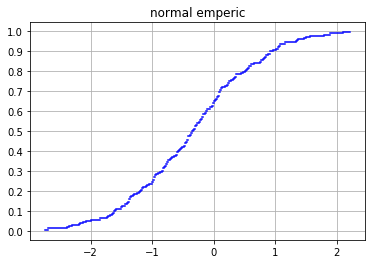

In [329]:
plt.axes()
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("normal emperic")
emperic(arr_normal, arr_normal_c)

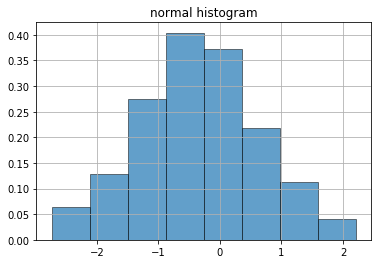

In [330]:
h = (af - a0) / m
plt.title("normal histogram")
histogram(xi_normal, w_normal, h)

In [331]:
sm_normal = sample_mean(xi_normal, w_normal, 1)
print(sm_normal)
dsp_shep_normal = dispersion_shep(xi_normal, w_normal, sm_normal, h)
print(dsp_shep_normal)
qd_normal = round(math.sqrt(dsp_shep_normal), 5)
print(qd_normal)
sf_normal = selective_fashion(int_normal, w_normal, h)
print(sf_normal)
smed_normal = selective_median(int_normal, w_normal, h)
print(smed_normal)
sm2_normal = sample_mean(xi_normal, w_normal, 2)
sm3_normal = sample_mean(xi_normal, w_normal, 3)
sm4_normal = sample_mean(xi_normal, w_normal, 4)
ac_normal = (sm3_normal - 3 * sm2_normal * sm_normal + 2 * (sm_normal ** 3)) / ((math.sqrt(sm2_normal - sm_normal ** 2)) ** 3)
print(ac_normal)
kc_normal = ((sm4_normal - 4 * sm3_normal * sm_normal + 6 * sm2_normal * sm_normal ** 2 - 3 * sm_normal ** 4) 
            / ((math.sqrt(sm2_normal - sm_normal ** 2)) ** 4)) - 3
print(kc_normal)

-0.34842
0.93228
0.96555
-0.38553
-0.3607858
0.03533057925
-0.328589824412


In [332]:
t_sm_normal = a
t_dsp_normal = o ** 2
t_qd_normal = math.sqrt(t_dsp_normal)
t_sf_normal = a
t_smed_normal = a
t_ac_normal = 0
t_kc_normal = 0

In [333]:
print(sm_normal, t_sm_normal, abs(t_sm_normal - sm_normal), abs((t_sm_normal - sm_normal) / t_sm_normal), sep = '\t')
print(dsp_shep_normal, t_dsp_normal, abs(t_dsp_normal - dsp_shep_normal), abs((t_dsp_normal - dsp_shep_normal) / t_dsp_normal), sep = '\t')
print(qd_normal, t_qd_normal, abs(t_qd_normal - qd_normal), abs((t_qd_normal - qd_normal) / t_qd_normal), sep = '\t')
print(sf_normal, t_sf_normal, abs(t_sf_normal - sf_normal), abs((t_sf_normal - sf_normal) / t_sf_normal), sep = '\t')
print(smed_normal, t_smed_normal, abs(t_smed_normal - smed_normal), abs((t_smed_normal - smed_normal) / t_smed_normal), sep = '\t')
print(ac_normal, t_ac_normal, abs(t_ac_normal - ac_normal), abs((t_ac_normal - ac_normal) / t_ac_normal), sep = '\t')
print(kc_normal, t_kc_normal, abs(t_kc_normal - kc_normal), abs((t_kc_normal - kc_normal) / t_kc_normal), sep = '\t')

-0.34842	-0.30000000000000004	0.04842	0.1614
0.93228	1.0609	0.12862	0.121236685833
0.96555	1.03	0.06445000000000001	0.06257281553398059
-0.38553	-0.30000000000000004	0.08553	0.2851
-0.3607858	-0.30000000000000004	0.0607858	0.202619333333
0.03533057925	0	0.03533057925	inf
-0.328589824412	0	0.328589824412	inf


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


In [334]:
print("Интервалы\twi\tpi\t|pi - wi|")
sum = 0
for i in range(len(int_normal) - 1):
    z = stats.norm.cdf(int_normal[i + 1], a, o) - stats.norm.cdf(int_normal[i], a, o)
    if (i == 0): print('[', end = "")
    else: print('(', end = "")
    print(int_normal[i], ',', int_normal[i + 1], ']\t', w_normal[i], '\t', round(z, 5),
        '\t', round(abs(z - w_normal[i]), 5), sep = "")
    sum += z
print(sum)

Интервалы	wi	pi	|pi - wi|
[-2.73583,-2.11733]	0.04	0.02981	0.01019
(-2.11733,-1.49883]	0.08	0.0834	0.0034
(-1.49883,-0.88033]	0.17	0.16434	0.00566
(-0.88033,-0.26183]	0.25	0.22821	0.02179
(-0.26183,0.35667]	0.23	0.22333	0.00667
(0.35667,0.97517]	0.135	0.15403	0.01903
(0.97517,1.59367]	0.07	0.07486	0.00486
(1.59367,2.21221]	0.025	0.02563	0.00063
0.983618935393


# exponential

In [278]:
l = 3 + (-1) ** V * 0.01 * V
print(l)
#arr_exp = np.around(np.random.exponential(1/l, N), 5)
arr_exp = [0.05174, 0.02413, 0.07671, 0.20856, 0.28771, 0.13135, 0.37197, 0.90276, 0.04248, 0.27395, 
0.30574, 0.49678, 0.15077, 0.0653, 0.03569, 0.2785, 0.07799, 0.64307, 0.10286, 0.09468, 
0.03354, 0.24577, 0.01596, 0.61811, 0.0591, 0.14455, 0.10891, 0.01622, 0.88208, 0.24962, 
0.21502, 0.47674, 0.19722, 0.3285, 0.21033, 0.80651, 0.97721, 0.10184, 0.06831, 0.53274, 
0.05148, 0.02722, 0.3797, 0.28411, 1.01512, 0.09749, 0.00063, 0.01506, 0.07802, 0.02047, 
0.19642, 0.12685, 1.32748, 0.36509, 0.02479, 0.41913, 0.34703, 0.2279, 1.25669, 0.44815, 
0.28504, 0.18268, 0.14914, 0.28282, 0.0315, 0.81106, 0.27521, 0.119, 0.33669, 2.01043, 
0.34454, 0.49143, 0.06819, 0.60151, 0.24783, 0.12738, 0.47379, 1.05731, 0.84133, 0.02287, 
0.25756, 0.85448, 0.2652, 0.37885, 0.30672, 0.06087, 0.41871, 0.58935, 1.01442, 0.18767, 
0.0301, 0.40424, 0.02128, 1.7073, 0.66598, 0.14264, 0.26163, 0.27823, 0.01244, 0.03421, 
0.30718, 0.38886, 0.40646, 0.28522, 0.06108, 1.30078, 0.13109, 0.01164, 0.08905, 0.10792, 
0.03479, 0.16783, 0.0922, 0.27221, 0.37046, 0.06404, 0.45272, 0.2292, 0.02659, 0.02303, 
0.08799, 0.32836, 0.08253, 0.03457, 0.3466, 0.30633, 0.51837, 0.03444, 0.7447, 0.0645, 
0.41611, 0.32863, 0.22144, 0.62446, 0.21646, 0.28792, 1.1309, 0.03457, 0.18371, 0.15587, 
0.1732, 0.03232, 0.6349, 0.56806, 0.08949, 0.12824, 0.2516, 0.71234, 0.15471, 0.01116, 
0.07957, 0.41123, 0.38494, 0.0665, 0.11186, 1.92169, 0.079, 0.26177, 0.4173, 0.73205, 
0.14681, 0.50615, 0.25888, 0.08006, 0.15469, 0.19525, 0.00032, 0.22126, 0.08316, 0.10099, 
0.06242, 0.11937, 0.17228, 0.38664, 0.2802, 0.0115, 0.40988, 0.10245, 0.05971, 0.43767, 
1.32136, 0.39814, 1.30795, 0.19598, 0.23277, 0.63134, 0.40095, 0.00472, 0.74938, 0.25091, 
0.64238, 0.10871, 0.08047, 0.7329, 0.0606, 0.26034, 0.33002, 0.04127, 0.1171, 0.0785]
arr_print(arr_exp)

2.97
0.05174, 0.02413, 0.07671, 0.20856, 0.28771, 0.13135, 0.37197, 0.90276, 0.04248, 0.27395, 
0.30574, 0.49678, 0.15077, 0.0653, 0.03569, 0.2785, 0.07799, 0.64307, 0.10286, 0.09468, 
0.03354, 0.24577, 0.01596, 0.61811, 0.0591, 0.14455, 0.10891, 0.01622, 0.88208, 0.24962, 
0.21502, 0.47674, 0.19722, 0.3285, 0.21033, 0.80651, 0.97721, 0.10184, 0.06831, 0.53274, 
0.05148, 0.02722, 0.3797, 0.28411, 1.01512, 0.09749, 0.00063, 0.01506, 0.07802, 0.02047, 
0.19642, 0.12685, 1.32748, 0.36509, 0.02479, 0.41913, 0.34703, 0.2279, 1.25669, 0.44815, 
0.28504, 0.18268, 0.14914, 0.28282, 0.0315, 0.81106, 0.27521, 0.119, 0.33669, 2.01043, 
0.34454, 0.49143, 0.06819, 0.60151, 0.24783, 0.12738, 0.47379, 1.05731, 0.84133, 0.02287, 
0.25756, 0.85448, 0.2652, 0.37885, 0.30672, 0.06087, 0.41871, 0.58935, 1.01442, 0.18767, 
0.0301, 0.40424, 0.02128, 1.7073, 0.66598, 0.14264, 0.26163, 0.27823, 0.01244, 0.03421, 
0.30718, 0.38886, 0.40646, 0.28522, 0.06108, 1.30078, 0.13109, 0.01164, 0.08905, 0.10792, 
0.0347

In [279]:
arr_exp.sort()
arr_print(arr_exp)

0.00032, 0.00063, 0.00472, 0.01116, 0.0115, 0.01164, 0.01244, 0.01506, 0.01596, 0.01622, 
0.02047, 0.02128, 0.02287, 0.02303, 0.02413, 0.02479, 0.02659, 0.02722, 0.0301, 0.0315, 
0.03232, 0.03354, 0.03421, 0.03444, 0.03457, 0.03457, 0.03479, 0.03569, 0.04127, 0.04248, 
0.05148, 0.05174, 0.0591, 0.05971, 0.0606, 0.06087, 0.06108, 0.06242, 0.06404, 0.0645, 
0.0653, 0.0665, 0.06819, 0.06831, 0.07671, 0.07799, 0.07802, 0.0785, 0.079, 0.07957, 
0.08006, 0.08047, 0.08253, 0.08316, 0.08799, 0.08905, 0.08949, 0.0922, 0.09468, 0.09749, 
0.10099, 0.10184, 0.10245, 0.10286, 0.10792, 0.10871, 0.10891, 0.11186, 0.1171, 0.119, 
0.11937, 0.12685, 0.12738, 0.12824, 0.13109, 0.13135, 0.14264, 0.14455, 0.14681, 0.14914, 
0.15077, 0.15469, 0.15471, 0.15587, 0.16783, 0.17228, 0.1732, 0.18268, 0.18371, 0.18767, 
0.19525, 0.19598, 0.19642, 0.19722, 0.20856, 0.21033, 0.21502, 0.21646, 0.22126, 0.22144, 
0.2279, 0.2292, 0.23277, 0.24577, 0.24783, 0.24962, 0.25091, 0.2516, 0.25756, 0.25888, 
0.26034, 0.26163, 

In [280]:
a0 = 0
af = arr_exp[-1]
int_exp = []
n_exp = []
w_exp = []
group(a0, af, arr_exp, int_exp, n_exp, w_exp)
int_exp = np.around(int_exp, 5)

Интервалы		ni	wi
[-0.0,0.2513]	107	0.535
(0.2513,0.5026]	56	0.28
(0.5026,0.7539]	18	0.09
(0.7539,1.0052]	7	0.035
(1.0052,1.2565]	4	0.02
(1.2565,1.5078]	5	0.025
(1.5078,1.7591]	1	0.005
(1.75913,2.01043]	2	0.01
			200	1.0


In [281]:
xi_exp = []
as_static_row(int_exp, n_exp, w_exp, xi_exp)

xi		ni	wi
0.12565 	107	0.535
0.37695 	56	0.28
0.62825 	18	0.09
0.87955 	7	0.035
1.13085 	4	0.02
1.38215 	5	0.025
1.63345 	1	0.005
1.88476 	2	0.01


In [282]:
arr_exp_c = [arr_exp[0]]
del_repeat(arr_exp, arr_exp_c)

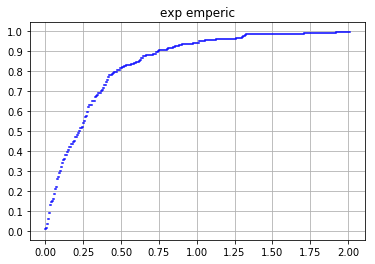

In [283]:
plt.axes()
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("exp emperic")
emperic(arr_exp, arr_exp_c)

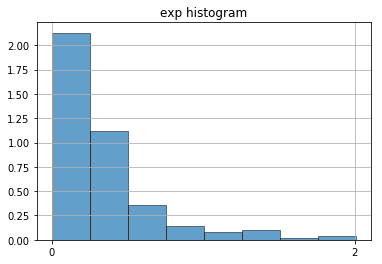

In [284]:
h = (af - a0) / m
plt.title("exp histogram")
plt.xticks(np.arange(0, 20, 2))
histogram(xi_exp, w_exp, h)

In [285]:
sm_exp = sample_mean(xi_exp, w_exp, 1)
print(sm_exp)
dsp_shep_exp = dispersion_shep(xi_exp, w_exp, sm_exp, h)
print(dsp_shep_exp)
qd_exp = round(math.sqrt(dsp_shep_exp), 5)
print(qd_exp)
sf_exp = selective_fashion(int_exp, w_exp, h)
print(sf_exp)
smed_exp = selective_median(int_exp, w_exp, h)
print(smed_exp)
sm2_exp = sample_mean(xi_exp, w_exp, 2)
sm3_exp = sample_mean(xi_exp, w_exp, 3)
sm4_exp = sample_mean(xi_exp, w_exp, 4)
ac_exp = (sm3_exp - 3 * sm2_exp * sm_exp + 2 * (sm_exp ** 3)) / ((math.sqrt(sm2_exp - sm_exp ** 2)) ** 3)
print(ac_exp)
kc_exp = ((sm4_exp - 4 * sm3_exp * sm_exp + 6 * sm2_exp * sm_exp ** 2 - 3 * sm_exp ** 4)
    / ((math.sqrt(sm2_exp - sm_exp ** 2)) ** 4)) - 3
print(kc_exp)

0.34428
0.10924
0.33051
0.17019
0.234863317757
2.24032669647
5.50192197887


In [286]:
t_sm_exp = 1/l
t_dsp_exp = 1/(l ** 2)
t_qd_exp = math.sqrt(t_dsp_exp)
t_sf_exp = 0
t_smed_exp = math.log(2) / l
t_ac_exp = 2
t_kc_exp = 6

In [287]:
print(sm_exp, t_sm_exp, abs(t_sm_exp - sm_exp), abs((t_sm_exp - sm_exp) / t_sm_exp), sep = '\t')
print(dsp_shep_exp, t_dsp_exp, abs(t_dsp_exp - dsp_shep_exp), abs((t_dsp_exp - dsp_shep_exp) / t_dsp_exp), sep = '\t')
print(qd_exp, t_qd_exp, abs(t_qd_exp - qd_exp), abs((t_qd_exp - qd_exp) / t_qd_exp), sep = '\t')
print(sf_exp, t_sf_exp, abs(t_sf_exp - sf_exp), abs((t_sf_exp - sf_exp) / t_sf_exp), sep = '\t')
print(smed_exp, t_smed_exp, abs(t_smed_exp - smed_exp), abs((t_smed_exp - smed_exp) / t_smed_exp), sep = '\t')
print(ac_exp, t_ac_exp, abs(t_ac_exp - ac_exp), abs((t_ac_exp - ac_exp) / t_ac_exp), sep = '\t')
print(kc_exp, t_kc_exp, abs(t_kc_exp - kc_exp), abs((t_kc_exp - kc_exp) / t_kc_exp), sep = '\t')

0.34428	0.33670033670033667	0.00757966329966	0.0225116
0.10924	0.11336711673412007	0.00412711673412	0.036404884
0.33051	0.33670033670033667	0.0061903367003366405	0.018385299999999823
0.17019	0	0.17019	inf
0.234863317757	0.23338288907742263	0.00148042867959	0.00634334712986
2.24032669647	2	0.240326696465	0.120163348233
5.50192197887	6	0.498078021134	0.0830130035223


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


In [288]:
print("Интервалы\twi\tpi\t|pi - wi|")

x = sympy.symbols('x')
f_exp = 1 - math.e ** (-l * x)
sum = 0
for i in range(len(int_exp) - 1) :
    z = f_exp.subs(x, int_exp[i + 1]) - f_exp.subs(x, int_exp[i])
    sum += z
    print(int_exp[i], ',', int_exp[i + 1], ']\t', w_exp[i], '\t', round(z, 5),
          '\t', round(abs(z - w_exp[i]), 5), sep = "")
print(sum)

Интервалы	wi	pi	|pi - wi|
0.0,0.2513]	0.535	0.52591	0.00909
0.2513,0.5026]	0.28	0.24933	0.03067
0.5026,0.7539]	0.09	0.1182	0.0282
0.7539,1.0052]	0.035	0.05604	0.02104
1.0052,1.2565]	0.02	0.02657	0.00657
1.2565,1.5078]	0.025	0.0126	0.0124
1.5078,1.7591]	0.005	0.00597	0.00097
1.7591,2.01043]	0.01	0.00283	0.00717
0.997448253111396


# uniform

In [289]:
a = (-1) ** V * 0.05 * V
b = a + 3
print(round(a, 5), b)
#arr_uniform = np.around(np.random.uniform(a, b, N), 5)
arr_uniform = [2.56921, 2.63773, 0.42738, 0.12093, 2.02851, 1.66284, 1.5845, 0.81536, 2.28168, 0.57988, 
1.1155, 1.96226, 2.77412, -0.10927, 0.73792, 2.25422, 2.20642, 1.37489, 0.14378, 1.0241, 
1.73737, 0.39785, -0.07205, 1.66863, 2.64618, 0.40947, 1.60383, 1.94281, 0.7595, 1.82115, 
0.7086, 2.05453, 1.2481, 0.70664, 0.88033, 1.11579, 1.97507, 2.75864, 2.70769, 2.7168, 
1.25082, 1.34943, 1.9802, 1.45377, 0.66394, 0.33136, 0.85707, 2.60792, 0.99837, 2.70303, 
0.8137, 1.54956, 0.26412, 0.51751, 1.2688, 2.04152, 2.60214, 0.37638, 0.99969, 1.24513, 
1.02213, 1.64325, 1.64105, 0.33761, 2.27502, -0.07423, 1.00115, 0.78888, 0.30111, 2.14444, 
0.83457, 2.13657, 1.66212, 2.02843, 1.1022, 1.65076, 0.39533, 2.25229, 1.15555, 0.69351, 
0.37971, 2.08604, 1.5215, 2.0461, 2.27205, 1.31414, 2.25755, 0.45103, 0.86669, 1.18301, 
2.76698, 1.00594, 0.81168, 2.07634, 1.00435, 2.83985, 1.48827, 0.09021, 1.92174, 2.00919, 
1.60606, 2.38557, 1.96959, -0.14849, 0.80541, 1.06672, 1.87179, 0.47122, 0.77971, 0.0563, 
1.3318, 1.54629, 2.83283, 0.90014, 2.01613, 2.68609, 2.14888, 2.48705, 2.30503, 0.39357, 
-0.13776, -0.10846, 1.3051, 2.84862, 0.17495, 1.64063, 2.32594, 0.11086, 1.84505, 2.38261, 
2.66796, 2.56757, 0.12032, 1.25206, 1.57298, 2.59622, 2.0171, 1.88092, 0.79903, 0.08348, 
0.44914, 1.74249, 1.89898, 2.73879, 1.7213, 2.78039, 0.50893, 0.99018, 1.43746, 0.9491, 
0.64859, 1.9116, 1.55858, 0.12373, 1.46501, 2.36762, 2.34535, 2.52775, 1.43216, 1.65423, 
1.18457, 0.43929, 0.35889, 0.54398, 1.82594, 0.46824, 2.46885, 2.40663, 0.4306, 0.04087, 
2.78808, 2.00008, 0.76373, 2.68129, 1.38953, 0.73799, 0.83706, 0.12075, 1.89708, 1.91384, 
2.52335, 2.37854, 2.77525, 1.95381, 2.5686, 1.93914, 0.71626, 0.49313, 2.27228, 2.0479, 
1.28661, -0.09377, 0.36376, 1.3991, 1.84436, 2.36511, 1.40026, 0.18624, 0.40505, 2.36387]
arr_print(arr_uniform)

-0.15 2.85
2.56921, 2.63773, 0.42738, 0.12093, 2.02851, 1.66284, 1.5845, 0.81536, 2.28168, 0.57988, 
1.1155, 1.96226, 2.77412, -0.10927, 0.73792, 2.25422, 2.20642, 1.37489, 0.14378, 1.0241, 
1.73737, 0.39785, -0.07205, 1.66863, 2.64618, 0.40947, 1.60383, 1.94281, 0.7595, 1.82115, 
0.7086, 2.05453, 1.2481, 0.70664, 0.88033, 1.11579, 1.97507, 2.75864, 2.70769, 2.7168, 
1.25082, 1.34943, 1.9802, 1.45377, 0.66394, 0.33136, 0.85707, 2.60792, 0.99837, 2.70303, 
0.8137, 1.54956, 0.26412, 0.51751, 1.2688, 2.04152, 2.60214, 0.37638, 0.99969, 1.24513, 
1.02213, 1.64325, 1.64105, 0.33761, 2.27502, -0.07423, 1.00115, 0.78888, 0.30111, 2.14444, 
0.83457, 2.13657, 1.66212, 2.02843, 1.1022, 1.65076, 0.39533, 2.25229, 1.15555, 0.69351, 
0.37971, 2.08604, 1.5215, 2.0461, 2.27205, 1.31414, 2.25755, 0.45103, 0.86669, 1.18301, 
2.76698, 1.00594, 0.81168, 2.07634, 1.00435, 2.83985, 1.48827, 0.09021, 1.92174, 2.00919, 
1.60606, 2.38557, 1.96959, -0.14849, 0.80541, 1.06672, 1.87179, 0.47122, 0.77971, 0.0563,

In [290]:
arr_uniform.sort()
arr_print(arr_uniform)

-0.14849, -0.13776, -0.10927, -0.10846, -0.09377, -0.07423, -0.07205, 0.04087, 0.0563, 0.08348, 
0.09021, 0.11086, 0.12032, 0.12075, 0.12093, 0.12373, 0.14378, 0.17495, 0.18624, 0.26412, 
0.30111, 0.33136, 0.33761, 0.35889, 0.36376, 0.37638, 0.37971, 0.39357, 0.39533, 0.39785, 
0.40505, 0.40947, 0.42738, 0.4306, 0.43929, 0.44914, 0.45103, 0.46824, 0.47122, 0.49313, 
0.50893, 0.51751, 0.54398, 0.57988, 0.64859, 0.66394, 0.69351, 0.70664, 0.7086, 0.71626, 
0.73792, 0.73799, 0.7595, 0.76373, 0.77971, 0.78888, 0.79903, 0.80541, 0.81168, 0.8137, 
0.81536, 0.83457, 0.83706, 0.85707, 0.86669, 0.88033, 0.90014, 0.9491, 0.99018, 0.99837, 
0.99969, 1.00115, 1.00435, 1.00594, 1.02213, 1.0241, 1.06672, 1.1022, 1.1155, 1.11579, 
1.15555, 1.18301, 1.18457, 1.24513, 1.2481, 1.25082, 1.25206, 1.2688, 1.28661, 1.3051, 
1.31414, 1.3318, 1.34943, 1.37489, 1.38953, 1.3991, 1.40026, 1.43216, 1.43746, 1.45377, 
1.46501, 1.48827, 1.5215, 1.54629, 1.54956, 1.55858, 1.57298, 1.5845, 1.60383, 1.60606, 
1.64063,

In [291]:
a0 = a
af = b
int_uniform = []
n_uniform = []
w_uniform = []
group(a0, af, arr_uniform, int_uniform, n_uniform, w_uniform)
int_uniform = np.around(int_uniform, 5)

Интервалы		ni	wi
[-0.15,0.225]	19	0.095
(0.225,0.6]	25	0.125
(0.6,0.975]	24	0.12
(0.975,1.35]	25	0.125
(1.35,1.725]	26	0.13
(1.725,2.1]	32	0.16
(2.1,2.475]	22	0.11
(2.475,2.85]	27	0.135
			200	1.0


In [292]:
xi_uniform = []
as_static_row(int_uniform, n_uniform, w_uniform, xi_uniform)

xi		ni	wi
0.0375 	19	0.095
0.4125 	25	0.125
0.7875 	24	0.12
1.1625 	25	0.125
1.5375 	26	0.13
1.9125 	32	0.16
2.2875 	22	0.11
2.6625 	27	0.135


In [293]:
arr_uniform_c = [arr_uniform[0]]
del_repeat(arr_uniform, arr_uniform_c)

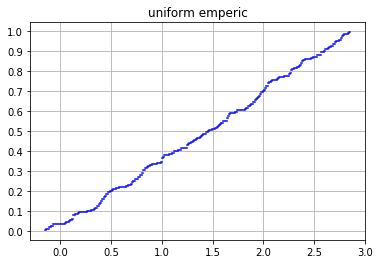

In [294]:
plt.axes()
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("uniform emperic")
emperic(arr_uniform, arr_uniform_c)

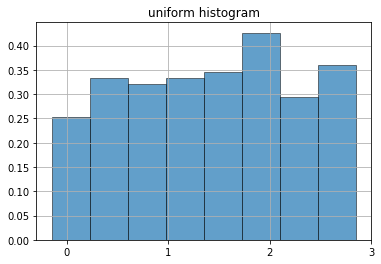

In [295]:
h = (af - a0) / m
plt.title("uniform histogram")
plt.xticks(np.arange(0, 20, 1))
histogram(xi_uniform, w_uniform, h)

In [296]:
sm_uniform = sample_mean(xi_uniform, w_uniform, 1)
print(sm_uniform)
dsp_shep_uniform = dispersion_shep(xi_uniform, w_uniform, sm_uniform, h)
print(dsp_shep_uniform)
qd_uniform = round(math.sqrt(dsp_shep_uniform), 5)
print(qd_uniform)
sf_uniform = selective_fashion(int_uniform, w_uniform, h)
print(sf_uniform)
smed_uniform = selective_median(int_uniform, w_uniform, h)
print(smed_uniform)
sm2_uniform = sample_mean(xi_uniform, w_uniform, 2)
sm3_uniform = sample_mean(xi_uniform, w_uniform, 3)
sm4_uniform = sample_mean(xi_uniform, w_uniform, 4)
ac_uniform = (sm3_uniform - 3 * sm2_uniform * sm_uniform + 2 * (sm_uniform ** 3)) / ((math.sqrt(sm2_uniform - sm_uniform ** 2)) ** 3)
print(ac_uniform)
kc_uniform = ((sm4_uniform - 4 * sm3_uniform * sm_uniform + 6 * sm2_uniform * sm_uniform ** 2 - 3 * sm_uniform ** 4)
    / ((math.sqrt(sm2_uniform - sm_uniform ** 2)) ** 4)) - 3
print(kc_uniform)

1.41188
0.68477
0.82751
1.86562
1.50234375
-0.0762083953682
-1.17062731604


In [297]:
t_sm_uniform = (a + b) / 2 
t_dsp_uniform = (b - a) ** 2 / 12
t_qd_uniform = math.sqrt(t_dsp_uniform)
t_sf_uniform = (a + b) / 2 
t_smed_uniform = (a + b) / 2 
t_ac_uniform = 0
t_kc_uniform = -6 / 5

In [298]:
print(sm_uniform, t_sm_uniform, abs(t_sm_uniform - sm_uniform), abs((t_sm_uniform - sm_uniform) / t_sm_uniform), sep = '\t')
print(dsp_shep_uniform, t_dsp_uniform, abs(t_dsp_uniform - dsp_shep_uniform), abs((t_dsp_uniform - dsp_shep_uniform) / t_dsp_uniform), sep = '\t')
print(qd_uniform, t_qd_uniform, abs(t_qd_uniform - qd_uniform), abs((t_qd_uniform - qd_uniform) / t_qd_uniform), sep = '\t')
print(sf_uniform, t_sf_uniform, abs(t_sf_uniform - sf_uniform), abs((t_sf_uniform - sf_uniform) / t_sf_uniform), sep = '\t')
print(smed_uniform, t_smed_uniform, abs(t_smed_uniform - smed_uniform), abs((t_smed_uniform - smed_uniform) / t_smed_uniform), sep = '\t')
print(ac_uniform, t_ac_uniform, abs(t_ac_uniform - ac_uniform), abs((t_ac_uniform - ac_uniform) / t_ac_uniform), sep = '\t')
print(kc_uniform, t_kc_uniform, abs(t_kc_uniform - kc_uniform), abs((t_kc_uniform - kc_uniform) / t_kc_uniform), sep = '\t')

1.41188	1.35	0.06188	0.045837037037
0.68477	0.75	0.06523	0.0869733333333
0.82751	0.8660254037844386	0.03851540378443863	0.044473757485785546
1.86562	1.35	0.51562	0.381940740741
1.50234375	1.35	0.15234375	0.112847222222
-0.0762083953682	0	0.0762083953682	inf
-1.17062731604	-1.2	0.0293726839594	0.0244772366329


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


In [299]:
print(a, b)
print("Интервалы\twi\tpi\t|pi - wi|")
sum = 0
for i in range(len(int_uniform) - 1):
    z = 1 / m
    if (i == 0): print('[', end = "")
    else: print('(', end = "")
    print(int_uniform[i], ',', int_uniform[i + 1], ']\t', w_uniform[i], '\t', round(z, 5),
          '\t', round(abs(z - w_uniform[i]), 5), sep = "")
    sum += z
print(sum)

-0.15000000000000002 2.85
Интервалы	wi	pi	|pi - wi|
[-0.15,0.225]	0.095	0.125	0.03
(0.225,0.6]	0.125	0.125	0.0
(0.6,0.975]	0.12	0.125	0.005
(0.975,1.35]	0.125	0.125	0.0
(1.35,1.725]	0.13	0.125	0.005
(1.725,2.1]	0.16	0.125	0.035
(2.1,2.475]	0.11	0.125	0.015
(2.475,2.85]	0.135	0.125	0.01
1.0
